# Equations différentielles
(Version de Rémy)

Modèle proie prédateur (Lotka Volterra) :
$$ \begin{matrix} \dot x_1 & = & x_1 ( \alpha - \beta x_2 ) \\ \dot x_2 & = & - x_2 ( \gamma - \delta x_2 )  \end{matrix}$$

On note $X=\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}$ et $f$ telle que $ f : X \mapsto \dot X $


In [2]:
# On initialise les blocs python : 
import matplotlib.pyplot as plt
import numpy as np

In [4]:
A=1
B=1
C=1
D=1

def f(X,a=A,b=B,c=C,d=D):
    x1,x2=X
    return(np.array([x1*(a-b*x2),-x2*(c-d*x1)]))

Question 1 : 

Interprétation physique : cf feuille

Points d'équillibre :
On cherche les points $ X$ tels que $f(X)=0$.$\\ $
 Si $x_1 = x_2 = 0$ alors $\dot x_1 = \dot x_2 = 0$ donc $(0,0)$ est un point d'équilibre.
 On trouve l'existence d'un deuxième point en supposant $x_1$ ou $x_2$ non nul.
 Pas d'autre point ? Non car on vient de passer tous les cas possibles (disjonction de cas).

 Stabilité ? Claculet $J_f (X)$ pour $X$ point d'équillibre et vérifier que la matrice est Hurwitz (valeurs propres à partie réelle strictement négative).



Question 2 :

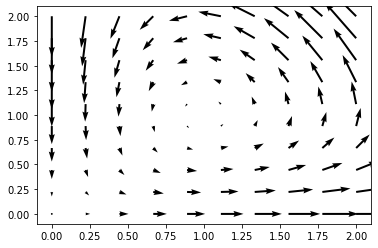

In [6]:
x=np.linspace(0,2,10)
y=np.linspace(0,2,10)
Xval,Yval=np.meshgrid(x,y)
X=np.array([Xval,Yval])
plt.figure()
Xp=f(X)
plt.quiver(Xval,Yval,Xp[0,:,:],Xp[1,:,:])
plt.show()

Conclusion : On va tourner autour du du point d'équilibre.

Question 3 :

Théorème de Cauchy-Lipschitz avec $J=\mathbb R$ et $X=(\mathbb R _+ ^* )^2$, ouvert de $\mathbb R ^2$.

$ x \to \partial_x f(x)$ existe et $C⁰$ sur $\mathbb R \times X$ ($f$ continuement dérivable).

Donc $\forall (t_0,x_0) \in J \times X, \exists ! $solution maximale dans $S_f(t_0,x_0)$

Cette solution va de $J$ dans $X$ sur son ensemble de définiton $I\in J$, donc elle reste dans $\mathbb R _{>0} \times \mathbb R _{>0}$ sur $I$

Question 4 :

Calcul (qu'il faut encore écrire) pour montrer que $H$ est une sorte de Hamiltonien (quantité invariante le long dune solution).
$\frac{dH}{dt}(x_1,x_2)=0$ le long d'une solution.

Question 5 :

In [8]:
def H(X,a=A,b=B,c=C,d=D):
    x1=X[0]
    x2=X[1]
    return(d*x1-c*np.log(x1)+b*x2-a*np.log(x2))

    

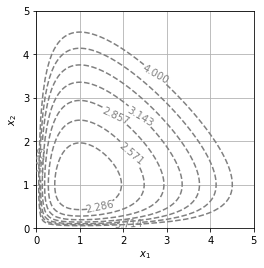

In [10]:
xmax=5
ymax=5

x=np.linspace(0,xmax,100)
y=np.linspace(0,ymax,100)
levels=np.linspace(0,4,15)

X, Y = np.meshgrid(x, y)
Z = H(np.array([X, Y]))
fig, ax = plt.subplots()
contour_set = plt.contour(
    X, Y, Z, colors="grey", linestyles="dashed", 
    levels=levels 
)
ax.clabel(contour_set)
plt.grid(True)
plt.xlim([0,xmax])
plt.ylim([0,ymax])
plt.xlabel("$x_1$") 
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")


Si on part d'une condition intitiale proche de $ \overline x$ on reste arbitrairement proche de $\overline x$ car on tourne autour du point d'équilibre (ou du moins on este sur un domaine dont la distance à $ \overline x$ est bornée), donc $\overline x$ est stable au sens de la définition de stabilité.
En prenant aussi en compte le champ de vecteurs on voit que les solutions "tournent" autour de $ \overline x$ dans le sens anti-horaire, elles sernt donc periodiques.

Question 6 : Méthode d'Euler explicite

In [12]:
def solve_euler_explicit(f,x0,dt,t0,tf):
    x=[x0]
    t=[t0]
    while t[-1]<tf:
        x.append(x[-1]+dt*f(x[-1]))
        t.append(t[-1]+dt)
    return np.array(t),np.array(x)

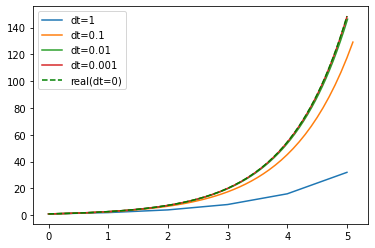

In [14]:
def fexp(x):
    return x

t,x=solve_euler_explicit(fexp,1,1,0,5)
plt.plot(t,x)
t,x=solve_euler_explicit(fexp,1,0.1,0,5)
plt.plot(t,x)
t,x=solve_euler_explicit(fexp,1,0.01,0,5)
plt.plot(t,x)
t,x=solve_euler_explicit(fexp,1,0.001,0,5)
plt.plot(t,x)
plt.plot(t,np.exp(np.array(t)),'g--')
plt.legend(["dt=1","dt=0.1","dt=0.01","dt=0.001","real(dt=0)"])

plt.show()


Pour visualiser l'ordre de convergence $p$ on trace pour un schéma dont on connait la solution exacte $max_j ||x(t_j)-x_j||$ en fonction de $\Delta t$ et on trace les $(\Delta t)^i $ pour differentes valeurs de $i$. A ce stade on peut déja voir pour lequel la tendance "colle" le mieux quand $\Delta t \to 0$. Pour être plus précis on trace $\frac{max_j ||x(t_j)-x_j||}{(\Delta t)^i}$ et on cherche le i pour lequel la courbe obtenue est la plus proche d'une droite. Ce i correspond approximativement à l'ordre de convergence et le $c_v$ est environ la pente de la droite.

Question 7 : Euler explicite sur Lotka Volterra

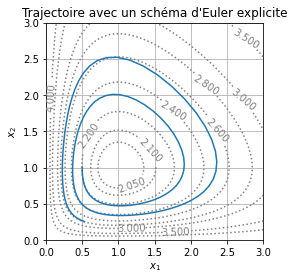

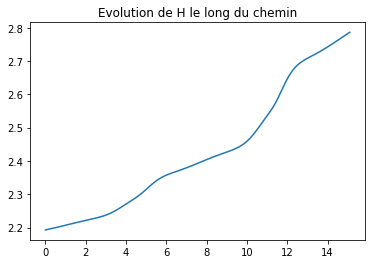

In [41]:
t,x=solve_euler_explicit(f,np.array([0.5,1]),0.1,0,15)
fig, ax = plt.subplots()
ax.plot(x[:,0],x[:,1])

xmax=3
ymax=3


levels=[2,2.05,2.1,2.2,2.4,2.6,2.8,3,3.5,4]

X, Y = np.meshgrid(np.linspace(0,xmax,100), np.linspace(0,ymax,100))
Z = H(np.array([X, Y]))

contour_set = plt.contour(
    X, Y, Z, colors="grey", linestyles="dotted", 
    levels=levels 
)
ax.clabel(contour_set)
plt.grid(True)
plt.xlim([0,xmax])
plt.ylim([0,ymax])
plt.xlabel("$x_1$") 
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")
plt.title("Trajectoire avec un schéma d'Euler explicite")

plt.figure()
plt.plot(t,H(x.transpose()))
plt.title("Evolution de H le long du chemin")
plt.show()

On voit qu'en temps long $H$ augmente, signe que l'on accumule de l'erreur par rapport à une solution exacte (pour laquelle $H$ resterait constante). La solution trouvée n'est donc pas fidèle a la réalité (on finit ici avec 50% d'erreur sur $H$). On pourrait diminuer $\Delta t$ pour atténuer cet effet mais il resterait toujours présent. Pour illustrer cela, on trace avec un $\Delta t $ dix fois plus petit (tracé rouge), on s'éloigne moins (donc on est plus proche d'une vraie solution) mais on continue irrémédiablement des'éloigner de la courbe de niveau.

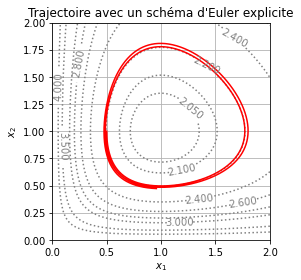

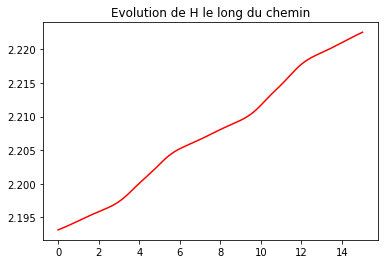

In [42]:
t,x=solve_euler_explicit(f,np.array([0.5,1]),0.01,0,15)
fig, ax = plt.subplots()
ax.plot(x[:,0],x[:,1],color='r')

xmax=2
ymax=2


levels=[2,2.05,2.1,2.2,2.4,2.6,2.8,3,3.5,4]

X, Y = np.meshgrid(np.linspace(0,xmax,100), np.linspace(0,ymax,100))
Z = H(np.array([X, Y]))

contour_set = plt.contour(
    X, Y, Z, colors="grey", linestyles="dotted", 
    levels=levels 
)
ax.clabel(contour_set)
plt.grid(True)
plt.xlim([0,xmax])
plt.ylim([0,ymax])
plt.xlabel("$x_1$") 
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")
plt.title("Trajectoire avec un schéma d'Euler explicite")

plt.figure()
plt.plot(t,H(x.transpose()),color='r')
plt.title("Evolution de H le long du chemin")
plt.show()

Question 8 : Euler Implicite

$x^{i+1}$ est le point fixe de $F(x)=x^i + \Delta t f(x)$ . $f $ est lipschitzienne sur un ouvert autour de $x^i$ (aussi grand que l'on veut tant qu'il reste borné). Donc $F $ est contractante pour $\Delta t$ suffisament petit car $F$ est lipschitzienne de rapport $\Delta t L_f$, donc (Théorème des points fixes de Banach) $x^{i+1}=F(x^i)$ converge vers le point fixe de $F$ car $ \mathbb R ^n $ est complet.

In [50]:
def solve_euler_implicit(f,x0,dt,t0,tf,itermax=100):
    x=[x0]
    t=[t0]
    while t[-1]<tf:
        xi=x[-1]
        xii=xi
        xij=xi+dt*f(xii)
        i=0
        while np.linalg.norm(xii-xij)>10**-3 and i<itermax:
            xii=xij
            xij=xi+dt*f(xii)
        x.append(xij)
        t.append(t[-1]+dt)
    return np.array(t),np.array(x)


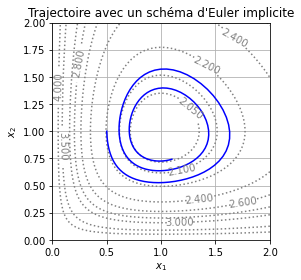

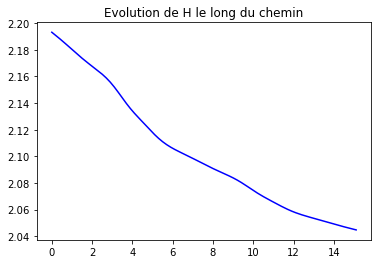

In [51]:
t,x=solve_euler_implicit(f,np.array([0.5,1]),0.1,0,15)
fig, ax = plt.subplots()
ax.plot(x[:,0],x[:,1],color='b')

xmax=2
ymax=2


levels=[2,2.05,2.1,2.2,2.4,2.6,2.8,3,3.5,4]

X, Y = np.meshgrid(np.linspace(0,xmax,100), np.linspace(0,ymax,100))
Z = H(np.array([X, Y]))

contour_set = plt.contour(
    X, Y, Z, colors="grey", linestyles="dotted", 
    levels=levels 
)
ax.clabel(contour_set)
plt.grid(True)
plt.xlim([0,xmax])
plt.ylim([0,ymax])
plt.xlabel("$x_1$") 
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")
plt.title("Trajectoire avec un schéma d'Euler implicite")

plt.figure()
plt.plot(t,H(x.transpose()),color='b')
plt.title("Evolution de H le long du chemin")
plt.show()

Ici $H$ diminue : on a le même probème de $H$ qui varie. Un schéma d'Euler implicite n'apporte donc pas d'amélioration à ce niveau là.

Question 9 : 
On s'intéresse au système :

$$ \begin{matrix} \dot x_1 & = & x_1 ( \alpha - \beta x_2 ) - u_1 (x_1,x_2)(H(x_1,x_2)-H_0) \\ \dot x_2 & = & - x_2 ( \gamma - \delta x_1 ) - u_2 (x_1,x_2)(H(x_1,x_2)-H_0)  \end{matrix}$$

Montrer que ses solutions sont identiques à celles de Lotka-Volterra si $H_0=H(X(0))$.

Si on considère une solution du système de Lotka-Volterra, $H$ est invariant le long de cette solution donc $H(X)=H_0$, donc le terme supplémentaire reste nul. X est solution du nouveau système.




Pour la réciproque on peut passer par un téorème de Cauhy-Lipschtz en supposant $u_1(H-H0$ et $u_2$ 